In [1]:
import sklearn
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[12,6])

In [2]:
np.random.seed(1)
wine_dataset = pd.read_csv("wine_dataset.csv")
print(wine_dataset.info())
wine_dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   class                    5000 non-null   int64  
 1   Alcohol                  5000 non-null   float64
 2   Malic_acid               5000 non-null   float64
 3   Ash                      5000 non-null   float64
 4   Alcalinity_of_ash        5000 non-null   float64
 5   Magnesium                5000 non-null   float64
 6   Total_phenols            5000 non-null   float64
 7   Flavanoids               5000 non-null   float64
 8   Nonflavanoid_phenols     5000 non-null   float64
 9   Proanthocyanins          5000 non-null   float64
 10  Color_intensity          5000 non-null   float64
 11  Hue                      5000 non-null   float64
 12  Od_Hod_of_diluted_wines  5000 non-null   float64
 13  Proline                  5000 non-null   float64
dtypes: float64(13), int64(1)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
0,1,13.761443,0.972960,2.191146,14.349954,106.525734,2.288580,2.584551,0.418044,1.862804,3.086808,1.169861,2.819086,850.678431
1,2,11.897923,1.297780,2.199666,17.478054,104.205421,2.716657,1.855066,0.318077,1.029640,9.103668,1.353718,2.780333,332.922006
2,3,12.659632,1.748552,2.438597,21.584696,88.079451,1.919476,0.681341,0.538078,1.327974,8.803633,0.643678,1.569951,633.531687
3,1,13.054828,1.817559,1.893926,15.390157,108.589893,2.662509,2.815723,0.278535,1.473812,6.386732,0.820398,3.694865,880.103325
4,3,11.769431,3.017528,3.013448,17.081528,86.525235,2.224963,0.846229,0.286065,1.644007,10.383464,0.734288,2.747013,475.152492


In [3]:
# check dimension and null data
print(wine_dataset.shape)

wine_dataset.isna().any().any()

# check stas
wine_dataset.describe()

(5000, 14)


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.966600,12.995186,2.330916,2.370151,19.496761,99.072699,2.300694,2.057249,0.362036,1.590397,5.086170,0.962753,2.609474,744.635286
std,0.772272,0.814378,1.118433,0.274757,3.351535,13.951364,0.617459,0.992019,0.124728,0.566114,2.337002,0.225385,0.704532,313.348736
min,1.000000,10.991005,0.478367,1.447951,10.366806,68.871553,0.969383,0.277914,0.109327,0.099295,1.129366,0.414259,1.112145,231.883252
25%,1.000000,12.386366,1.592804,2.236354,17.372474,88.827614,1.791985,1.223907,0.270011,1.238714,3.271563,0.802881,1.996074,507.083531
50%,2.000000,13.026910,1.867287,2.369439,19.383204,97.561288,2.324534,2.138558,0.335068,1.546307,4.745563,0.977078,2.770427,665.609642
75%,3.000000,13.624392,2.940638,2.542378,21.429700,105.978061,2.755317,2.808482,0.442366,1.888451,6.214175,1.104621,3.146931,948.204369
max,3.000000,14.802882,6.242546,3.167812,30.236014,164.765854,3.882879,4.397836,0.756410,3.700137,13.120260,1.603007,4.032795,1782.712893


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Separating the target and the rest of the dataset
target = wine_dataset["class"]
wine_dataset.drop(columns=["class"], inplace=True)

# Scaling the data using MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(wine_dataset)

# Transforming the scaled data back to a DataFrame
wine_dataset = pd.DataFrame(x_scaled, columns=wine_dataset.columns)

# Adding the target back to the dataset at the beginning
wine_dataset.insert(0, "class", target)

# Displaying the first few rows
wine_dataset.head(5)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
0,1,0.726791,0.085805,0.432125,0.200468,0.392663,0.452788,0.559874,0.477090,0.489749,0.163244,0.635628,0.584439,0.399009
1,2,0.237919,0.142156,0.437079,0.357903,0.368467,0.599717,0.382811,0.322602,0.258369,0.665030,0.790293,0.571170,0.065151
2,3,0.437744,0.220358,0.576004,0.564587,0.200303,0.326101,0.097921,0.662590,0.341220,0.640008,0.192992,0.156748,0.258989
3,1,0.541419,0.232330,0.259309,0.252821,0.414189,0.581132,0.615985,0.261494,0.381721,0.438447,0.341653,0.884296,0.417983
4,3,0.204211,0.440507,0.910246,0.337946,0.184095,0.430953,0.137943,0.273130,0.428986,0.771760,0.269215,0.559762,0.156864


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set up stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=30)

for train_ind, test_ind in split.split(wine_dataset, wine_dataset["class"]):
    train_set = wine_dataset.loc[train_ind]
    test_set = wine_dataset.loc[test_ind]

# Display dataset information
train_set.info()
test_set.info()

# Create X and Y for train and test set
train_X = train_set.drop("class", axis=1)
train_y = train_set["class"]
test_X = test_set.drop("class", axis=1)
test_y = test_set["class"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1725 to 3709
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   class                    4000 non-null   int64  
 1   Alcohol                  4000 non-null   float64
 2   Malic_acid               4000 non-null   float64
 3   Ash                      4000 non-null   float64
 4   Alcalinity_of_ash        4000 non-null   float64
 5   Magnesium                4000 non-null   float64
 6   Total_phenols            4000 non-null   float64
 7   Flavanoids               4000 non-null   float64
 8   Nonflavanoid_phenols     4000 non-null   float64
 9   Proanthocyanins          4000 non-null   float64
 10  Color_intensity          4000 non-null   float64
 11  Hue                      4000 non-null   float64
 12  Od_Hod_of_diluted_wines  4000 non-null   float64
 13  Proline                  4000 non-null   float64
dtypes: float64(13), int64

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize and train the AdaBoost classifier
clf = AdaBoostClassifier()
clf.fit(train_X, train_y.values.ravel())

# Evaluate the model on the training data
predictions = clf.predict(train_X)
accuracy = accuracy_score(train_y, predictions)
f1 = f1_score(train_y, predictions, average='weighted')

print(f"Mean of Predictions: {predictions.mean():.5f}")
print(f"Training Accuracy: {accuracy:.5f}")
print(f"Training F1 Score (weighted): {f1:.5f}")

Mean of Predictions: 1.96575
Training Accuracy: 0.92425
Training F1 Score (weighted): 0.92425


In [11]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores: 10 fold
scores = cross_val_score(clf, train_X, train_y, scoring="f1_weighted", cv=10)

# Display the results
print("Individual Cross-Validation F1 Weighted Scores:", scores)
print("Average F1 Weighted Score:", scores.mean())

Individual Cross-Validation F1 Weighted Scores: [0.91993458 0.91497605 0.94750855 0.94253126 0.91524293 0.92740958
 0.915      0.89516025 0.89741756 0.92508547]
Average F1 Weighted Score: 0.9200266242486934


In [12]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

def stratFold(train_X_all, train_y_all, classifier, metric, average=None, fold=5):
    train_metric, val_metric, indices = [], [], []

    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        
        metric_list = []
        metric_list_train = []
        
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds, test_X_fold = train_X.iloc[train_index], train_X.iloc[test_index]
            train_y_folds, test_y_fold = train_y.iloc[train_index], train_y.iloc[test_index]
            
            classifier.fit(train_X_folds, train_y_folds.values.ravel())
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            
            if average:
                metric_val = metric(y_true=test_y_fold.values, y_pred=test_y_fold_pred, average=average)
                metric_train = metric(y_true=train_y_folds.values, y_pred=train_y_folds_pred, average=average)
            else:
                metric_val = metric(y_true=test_y_fold.values, y_pred=test_y_fold_pred)
                metric_train = metric(y_true=train_y_folds.values, y_pred=train_y_folds_pred)

            metric_list.append(metric_val)
            metric_list_train.append(metric_train)

        val_metric.append(np.mean(metric_list))
        train_metric.append(np.mean(metric_list_train))
        indices.append(m)

    return train_metric, val_metric, indices

In [13]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    
    plt.plot(indices, train_scores, "r-+", linewidth=2, label="train", zorder=5)
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation", zorder=5)
    
    plt.title(title, fontsize=14) 
    plt.legend(fontsize=10)
    
    plt.xlabel('Training Instances', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    

    plt.tick_params(axis='both', which='major', labelsize=12) 
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
    
    if inverse_x:
        plt.gca().invert_xaxis()
    
    plt.show()

In [14]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


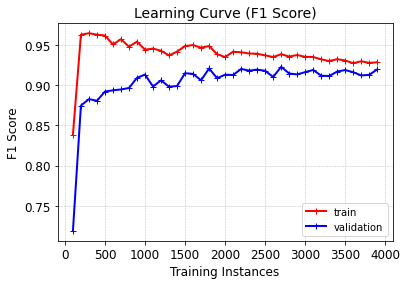

In [15]:
from sklearn.metrics import f1_score

f1_scores = stratFold(train_X, train_y, clf, f1_score, average='weighted')

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="Learning Curve (F1 Score)")

In [18]:
# Grid Search on Parameters for AdaBoost using a DecisionTreeClassifier as a base estimator
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    "base_estimator__max_depth": [1, 2, 3],
    'n_estimators': [50, 70, 100, 120],
    'base_estimator__criterion': ['entropy', 'gini'],
    'learning_rate': [0.1, 0.3, 0.5, 0.7]
}

# Create a base decision tree classifier
base_tree = DecisionTreeClassifier(max_depth=None, class_weight="balanced")

# AdaBoost using the base decision tree classifier
adaBoost = AdaBoostClassifier(base_tree)

# Conduct grid search
search_f1 = GridSearchCV(adaBoost, param_grid, cv=10, 
                         scoring='f1_weighted', n_jobs=-1)
search_f1.fit(train_X, train_y.values.ravel())

# Display best parameters and score
print("Best Parameters:", search_f1.best_params_)
print("Best F1 Score:", search_f1.best_score_)

results = pd.DataFrame(search_f1.cv_results_)

# Display the F1 scores for each combination of parameters
for index, row in results.iterrows():
    print("Base Estimator Max Depth:", row['param_base_estimator__max_depth'])
    print("Base Estimator Criterion:", row['param_base_estimator__criterion'])
    print("Number of Estimators:", row['param_n_estimators'])
    print("Learning Rate:", row['param_learning_rate'])
    print("Mean F1 Score:", row['mean_test_score'])
    print("Standard Deviation of F1 Score:", row['std_test_score'])
    print("--------------------------------------------------------")

# Visualizing the learning curve for the best model
# f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, f1_score, average='macro')
# plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], title="Learning Curve (F1 Score)")


Best Parameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 120}
Best F1 Score: 0.9304517918265347
Base Estimator Max Depth: 1
Base Estimator Criterion: entropy
Number of Estimators: 50
Learning Rate: 0.1
Mean F1 Score: 0.9237134886855551
Standard Deviation of F1 Score: 0.014699115019670438
--------------------------------------------------------
Base Estimator Max Depth: 1
Base Estimator Criterion: entropy
Number of Estimators: 70
Learning Rate: 0.1
Mean F1 Score: 0.9249566976579269
Standard Deviation of F1 Score: 0.014674910196941298
--------------------------------------------------------
Base Estimator Max Depth: 1
Base Estimator Criterion: entropy
Number of Estimators: 100
Learning Rate: 0.1
Mean F1 Score: 0.9269602384742024
Standard Deviation of F1 Score: 0.015880811079869567
--------------------------------------------------------
Base Estimator Max Depth: 1
Base Estimator Criterion: entropy
Number of Estimators

In [16]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=False):
    
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train", zorder=5)
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation", zorder=5)
    
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10)
    
    plt.ylabel('F1 Score', fontsize=12)
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
    
    plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[0.92385178 0.92649595 0.92544139 0.92749548 0.92717347 0.92594893
 0.92412636 0.92329647 0.91920147 0.91609345 0.91673299 0.9134215
 0.91204886 0.90867876 0.90717024 0.90662431 0.90151303 0.90034869
 0.89357773 0.88975262] [0.92346676 0.92371805 0.92570731 0.92221215 0.92596771 0.92121716
 0.92092508 0.91445225 0.9125131  0.91401029 0.90300476 0.91145618
 0.90320837 0.89720857 0.90620531 0.89848316 0.88946236 0.89004681
 0.8872069  0.8815032 ] [0.1        0.17368421 0.24736842 0.32105263 0.39473684 0.46842105
 0.54210526 0.61578947 0.68947368 0.76315789 0.83684211 0.91052632
 0.98421053 1.05789474 1.13157895 1.20526316 1.27894737 1.35263158
 1.42631579 1.5       ]


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   19.3s finished


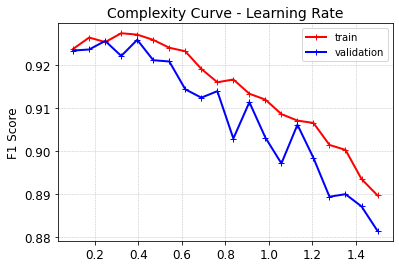

In [19]:
from sklearn.model_selection import validation_curve

empty_decision_tree = DecisionTreeClassifier(max_depth=1, splitter="random", 
                                             class_weight='balanced')

adaBoost = AdaBoostClassifier(empty_decision_tree, learning_rate=1.0, 
                              n_estimators=70)

param_range = np.linspace(0.1,1.5,20)

train_scores, test_scores = validation_curve(
    adaBoost, train_X, train_y.values.ravel(), param_name="learning_rate", 
    param_range=param_range, n_jobs=-1,
    scoring='f1_weighted', verbose=1, cv=10, 
)

print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)

plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='Complexity Curve - Learning Rate')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[0.87928016 0.91066598 0.9150724  0.92160706 0.92263392 0.92305478
 0.92530589 0.92533828 0.92693008 0.92682055 0.92611948 0.92798426
 0.92645336 0.92626177 0.92631598 0.92774139 0.92839906 0.92928983
 0.92839767 0.92892439] [0.87157051 0.90601183 0.9133791  0.92222496 0.92293901 0.92018927
 0.91773333 0.9227076  0.9216786  0.92046659 0.91971204 0.92070003
 0.91877561 0.91601204 0.91919808 0.91770499 0.91944838 0.92393661
 0.91570626 0.91816334] [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200]


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   31.4s finished


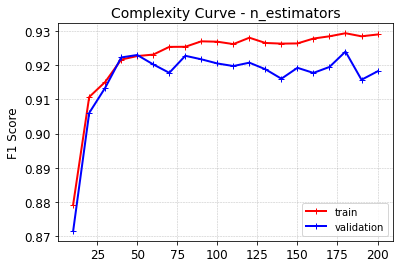

In [20]:
from sklearn.model_selection import validation_curve

empty_decision_tree = DecisionTreeClassifier(max_depth=1, splitter="random", 
                                             class_weight='balanced')

adaBoost = AdaBoostClassifier(empty_decision_tree, learning_rate=0.5, 
                              n_estimators=70)

param_range = np.linspace(10, 200, 20).astype(int)

train_scores, test_scores = validation_curve(
    adaBoost, train_X, train_y.values.ravel(), param_name="n_estimators", 
    param_range=param_range, scoring='f1_weighted', verbose=1, cv=10, n_jobs=-1
)

print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)

plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='Complexity Curve - n_estimators')

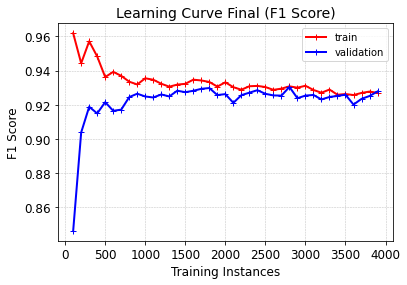

In [29]:
best_adaboost = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         random_state=None,
                                                         splitter='random'),
                   learning_rate=0.1, n_estimators=100, random_state=None)

f1_scores = stratFold(train_X, train_y, best_adaboost, f1_score, 
                      average='macro')

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="Learning Curve Final (F1 Score)")

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Train the model on the training data
best_adaboost.fit(train_X, train_y)

# Predict on the test data
test_predictions = best_adaboost.predict(test_X)

# Print the comprehensive classification report
print(classification_report(test_y, test_predictions, digits=5))

# Print the confusion matrix for a detailed breakdown of predictions
print(confusion_matrix(test_y, test_predictions))

              precision    recall  f1-score   support

           1    0.91212   0.95556   0.93333       315
           2    0.95866   0.92060   0.93924       403
           3    0.92933   0.93262   0.93097       282

    accuracy                        0.93500      1000
   macro avg    0.93337   0.93626   0.93452      1000
weighted avg    0.93573   0.93500   0.93505      1000

[[301   8   6]
 [ 18 371  14]
 [ 11   8 263]]
